In [8]:
#import some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#this sample represents the evolution of the system states in time

#this sample represents a non repairable system, i.e. it assesses reliability
sample =["up","up","up","up","down","down"]

#this sample represents a repairable system, i.e. it assesses availability 
#sample =["up","up","up","up","down","down","up"]

#this sample represents a repairable multiple state system, i.e. it assesses availability of some configuration
#sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","down/down","up/down","down/down","down/up","down/down","down/up","down/up","up/up","up/up","up/up"]

#this is an incomplete sample as the transitions from down/down have not been observed
#sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","up/down","up/up","down/up","down/up","down/down"]

#this sample represents a repairable multiple state system at a higher time resolution, i.e. it assesses availability of some configuration
#sample =["up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up",
 #        "up/down","up/down","up/down","up/down","up/down","up/down","up/up","up/up","up/up","up/up","up/up","up/up",
  #       "down/up","down/up","down/up","down/up","down/up","down/up","up/up","up/up","up/up","up/up","up/up","up/up",
   #      "up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down",
    #     "down/down","down/down","down/down","down/down","down/down","down/down","up/down","up/down","up/down","up/down","up/down","up/down",
     #    "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up",
      #   "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up",
       #  "up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up"]

#print("survey of state transitions: \n",tuple(zip(sample,sample[1:])),"\n")

In [22]:
#define state transition matrix

n=pd.DataFrame(sample)[0].unique()
n=n.tolist()
n.sort(reverse=True)
print("survey of the unique states in the sample, sorted descending: ",n)

tm=pd.DataFrame(0,columns=n,index=n)
print("empty state transition matrix: \n",tm)

survey of the unique states in the sample, sorted descending:  ['up', 'down']
empty state transition matrix: 
       up  down
up     0     0
down   0     0


In [23]:
# load the state transition matrix 

for (i,j) in zip(sample,sample[1:]):
    tm.loc[i,j] += 1
    
tm=tm.apply(lambda x: x/x.sum(), axis="columns")

print("print the transition matrix, the proportions in each row sum up to one:\n", tm)

print the transition matrix, the proportions in each row sum up to one:
         up  down
up    0.75  0.25
down  0.00  1.00


In [25]:
#define the initial state of the system

s = pd.Series(0,index=n)
s[0]=1
print("check whether the values in this series add up to one:\n",s)

#calculate the evolution of the system states in time

t=10 #define the time interval of interest

em=pd.DataFrame()

for i in range(t):
    em=em.append(s,ignore_index=True)
    s=tm.T.dot(s.T)
    
print("the evolution matrix, given the initial state and the state transition matrix:\n",em)


check whether the values in this series add up to one:
 up      0
down    1
dtype: int64
the evolution matrix, given the initial state and the state transition matrix:
    down   up
0   1.0  0.0
1   1.0  0.0
2   1.0  0.0
3   1.0  0.0
4   1.0  0.0
5   1.0  0.0
6   1.0  0.0
7   1.0  0.0
8   1.0  0.0
9   1.0  0.0


In [19]:
#add a columns that defines the upstate of the system

sem=em.copy()
sem["up_system_1"]=em.iloc[:,len(em.iloc[0,:])-1]
sem["up_system_2"]=1-em.iloc[:,0]

#print("the evolution of the upstate by two definitions:\n",sem)

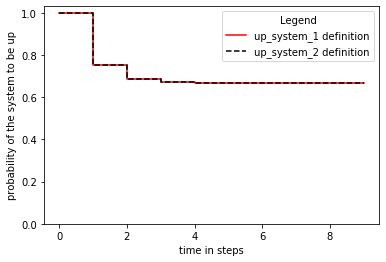

In [20]:
#plot the system upstate in a graph

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) # one row, one column, first plot

line, = ax1.step(sem.index,
         sem["up_system_1"],
         where="post",
        label="up_system_1 definition",
        color="red")

line, = ax1.step(sem.index,
         sem["up_system_2"],
         where="post",
        label="up_system_2 definition",
        color="black",
        linestyle="dashed")

ax1.set_ylim([0, 1.03])
xtext = ax1.set_xlabel('time in steps') # returns a Text instance
ytext = ax1.set_ylabel('probability of the system to be up')

plt.legend(title='Legend')
#plt.savefig("C:/Users/Chris/Pythonprojects/RAMS/figures/StateTransitionPlot01.png")
plt.show()